**ORE SPESE SU QUESTO HOMEWORK**\
- 2 ora e mezza il 14-12
- 1 ora il 15-12
- 1 ora e mezza il 16-12
- 2 ore il 20-12

In [21]:
import pandas as pd
from datetime import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure
from scipy.spatial.distance import cdist
from random import randint
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from collections import defaultdict
from operator import itemgetter
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import MiniBatchKMeans
from sklearn_extra.robust import RobustWeightedKMeans

In [128]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
from collections import OrderedDict
from itertools import islice
import warnings

### Let's import the datasets
**HERO-NETWORK:**\
It contains the network of heroes who have appeared together in the comics.

In [23]:
dfheros = pd.read_csv(r'C:\Users\gianl\Documents\Università_4°anno(2022-2023\ADM\HOMEWORK\HOMEWORK 5\hero-network.csv')

In [24]:
dfheros.head(5)

,hero1,hero2
0,"LITTLE, ABNER",PRINCESS ZANDA
1,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
2,BLACK PANTHER/T'CHAL,PRINCESS ZANDA
3,"LITTLE, ABNER",PRINCESS ZANDA
4,"LITTLE, ABNER",BLACK PANTHER/T'CHAL


In [25]:
dfheros.shape

(574467, 2)

**EDGES:**\
It contains two columns (hero, comic), indicating which comics the heroes appear in.

In [26]:
dfedges = pd.read_csv(r'C:\Users\gianl\Documents\Università_4°anno(2022-2023\ADM\HOMEWORK\HOMEWORK 5\edges.csv')

In [27]:
dfedges.head(5)

,hero,comic
0,24-HOUR MAN/EMMANUEL,AA2 35
1,3-D MAN/CHARLES CHAN,AVF 4
2,3-D MAN/CHARLES CHAN,AVF 5
3,3-D MAN/CHARLES CHAN,COC 1
4,3-D MAN/CHARLES CHAN,H2 251


In [28]:
dfedges.shape

(96104, 2)

**NODES:**\
It contains two columns (node, type), indicating the nodes' name and type (comic, hero).

In [29]:
dfnodes = pd.read_csv(r'C:\Users\gianl\Documents\Università_4°anno(2022-2023\ADM\HOMEWORK\HOMEWORK 5\nodes.csv')

In [30]:
dfnodes.head(5)

,node,type
0,2001 10,comic
1,2001 8,comic
2,2001 9,comic
3,24-HOUR MAN/EMMANUEL,hero
4,3-D MAN/CHARLES CHAN,hero


In [31]:
dfnodes.shape

(19090, 2)

# QUESTION 1: DATA

## GRAPHS SETUP
### 1)

An edge between two heroes can be found if they have appeared in the same comic together. The number of edges between two heroes represents the number of times they have collaborated in different comics. Let's find all edges

In [17]:
G_heros = nx.MultiGraph()

In [18]:
primo = dfheros.apply(lambda row:G_heros.add_edge(row['hero1'], row['hero2']),axis=1)

In [38]:
nx.info(G_heros)

C:\Users\gianl\AppData\Local\Temp\ipykernel_19244\1862108493.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(G_heros)


'MultiGraph with 6426 nodes and 574467 edges'

In [125]:
#I NODI SOPRA SONO 6426 PER DOVREBBERO ESSERE 6211 BO
c = dfheros.hero1.value_counts()
c.size

6211

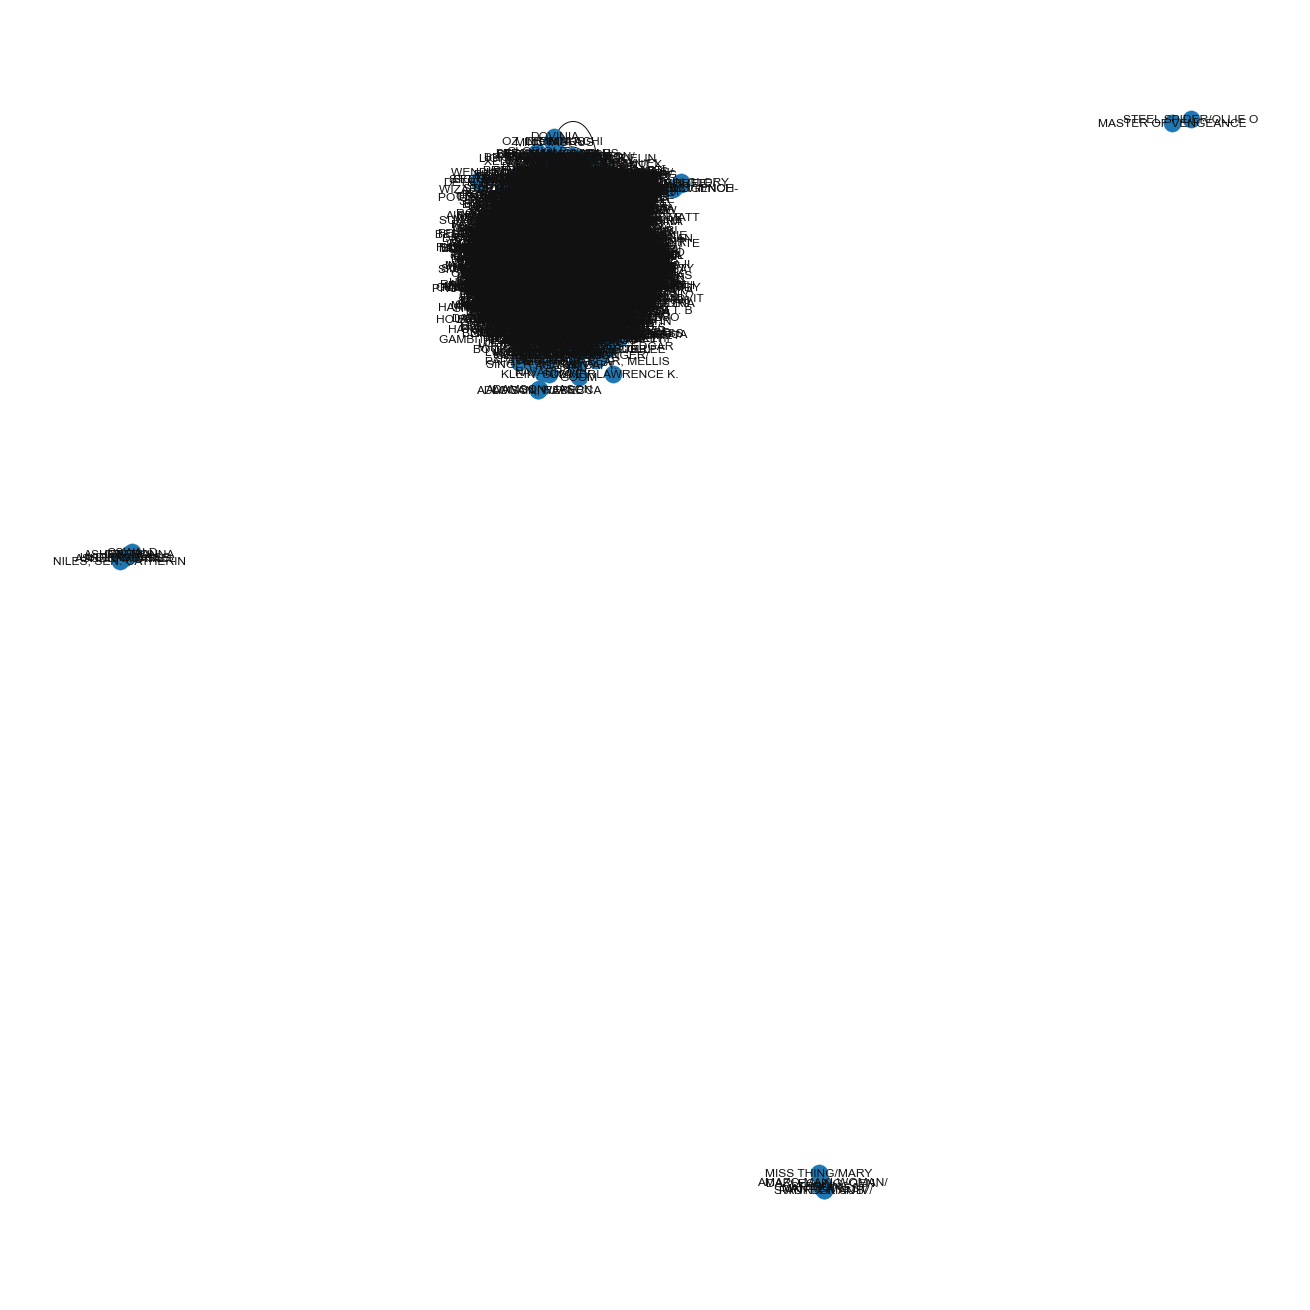

In [20]:
fig = plt.figure(figsize=(18,18))
nx.draw(G_heros, with_labels=True,node_size=300)
plt.show()

# 1 fatta in altro modo (mi sa sbagliato)

- Crea un dizionario vuoto chiamato graph che userai per memorizzare i nodi del grafo e i loro archi.
- Itera attraverso le righe del tuo dataset.
- Per ogni riga, estrai i valori delle due colonne. Se entrambi i valori sono presenti nella riga, aggiungi un arco tra i due nodi nel grafo. Se uno dei due valori non è presente nella riga, salta questo passaggio.
- Se un arco tra i due nodi esiste già nel grafo, incrementa il peso dell'arco di 1. Altrimenti, aggiungi un nuovo arco al grafo con peso 1.

In [15]:
from collections import defaultdict

def build_graph(df):
    graph = defaultdict(list)
    for _, row in df.iterrows():
        hero1, hero2 = row['hero1'], row['hero2']
        if hero1 and hero2:
          # Aggiungi un arco tra i due nodi
            graph[hero1].append(hero2)
            graph[hero2].append(hero1)
    return graph

In [64]:
#pip install scipy==1.8.1

  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3
Note: you may need to restart the kernel to use updated packages.


In [53]:
nx.info(G1)

C:\Users\gianl\AppData\Local\Temp\ipykernel_19244\968434106.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(G1)


'Graph with 6426 nodes and 167219 edges'

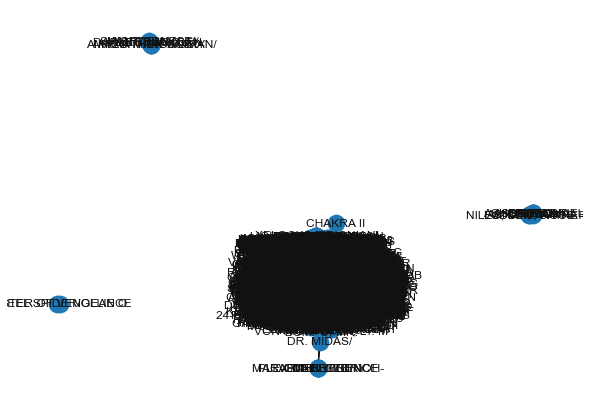

In [16]:
import networkx as nx
import matplotlib.pyplot as plt

# Costruisci il grafo utilizzando il metodo che hai scelto
graph = build_graph(dfheros)

# Crea un oggetto grafo di networkx dal grafo che hai costruito
G1 = nx.Graph()

# Aggiungi i nodi e gli archi al grafo di networkx
for node, edges in graph.items():
    G1.add_node(node)
    for edge in edges:
        G1.add_edge(node, edge)

# Disegna il grafo utilizzando la funzione nx.draw()
nx.draw(G1, with_labels=True)

# Mostra il grafo
plt.show()

In [ ]:
import csv
import networkx as nx

# create an empty graph
G = nx.Graph()

# open the csv file and read the data
with open('hero-network.csv', 'r') as f:
  reader = csv.reader(f)
  
  # add each edge to the graph
  for row in reader:
    hero1, hero2, weight = row[0], row[1], int(row[2])
    G.add_edge(hero1, hero2, weight=weight)

### 2)

In [135]:
G2 = nx.Graph()
G2 = nx.from_pandas_edgelist(dfedges, 'comic', 'hero')

In [136]:
warnings.filterwarnings("ignore", category=DeprecationWarning) #this command is used to don't visualize the warnings
nx.info(G2)

'Graph with 19090 nodes and 96104 edges'

## DATA PREPROCESSING
### 1)

**1.1**

"Some heroes' names in 'hero-netowrk.csv' have extra spaces at the end of their names compared to their names in 'edges.csv'" :

The following command gets the string of heroes inside column 'hero1' (in dataset heros) that have a space in the last position: '  '. Once we have these heroes, we edit the string by deleting the space in the last position.

In [318]:
for i in range(len(dfheros.hero1)):
    if dfheros.hero1[i][-1] == ' ':
        dfheros.hero1[i]= dfheros.hero1[i][0:-1]

**1.2**

Some heroes' names in 'hero-netowrk.csv' have an extra '/' at the end of their names compared to their names in 'edges.csv'.

- We could do the same things of above, but we noticed that in the column hero (dataset edges) we have heros which have in the last position a slash: '/'. So we can't remove these heros but we have to remove only the heroes that within hero1 (in dataset heros) have a slash in the last position, while in hero (dataset edges) they don't.

- However, to make things easier, we decided to remove the / in the last position in all heroes even those that are normally registered with the / in the last position (for example 8-BALL/ it is normally registered with the / in the last position because it has it in both the heros and edges datasets, but to make things easier we will remove the / even for 8-BALL/ in both dataset)

- The following query, therefore, removes the / in last position (to whoever has it) to all heroes in 'hero1' (dataset heros) and in 'hero' (dataset edges):

In [308]:
#for the dataset 'dfheros'
for i in range(len(dfheros.hero1)):
    if dfheros.hero1[i][-1] == '/':
        dfheros.hero1[i]= dfheros.hero1[i][0:-1]
        
#for the dataset 'dfedges'
for i in range(len(dfedges.hero)):
    if dfedges.hero[i][-1] == '/':
        dfedges.hero[i]= dfedges.hero[i][0:-1]

**1.3**

The hero name 'SPIDER-MAN/PETER PARKER' in 'edges.csv' has been changed to 'SPIDER-MAN/PETER PAR' in 'hero-network.csv' due to a string length limit in 'hero-network.csv'

We can see inside the dataset edges there are 1577 times the name 'SPIDER-MAN/PETER PARKER' in the column 'hero'.

In [183]:
dfedges[dfedges.hero == 'SPIDER-MAN/PETER PARKER'].shape

(1577, 2)

In order to avoid the problem of having two different name for the same hero in two different dataset, we decided to change inside the dataset edges, the name of the hero 'SPIDER-MAN/PETER PARKER' in 'SPIDER-MAN/PETER PAR'.

In [185]:
dfedges.hero = dfedges.hero.replace('SPIDER-MAN/PETER PARKER', 'SPIDER-MAN/PETER PAR')

Altought before were 1577 rows, now we can see that 'SPIDER-MAN/PETER PARKER' doesn't appear anymore.

In [186]:
dfedges[dfedges.hero == 'SPIDER-MAN/PETER PARKER'].shape

(0, 2)

### 2)

Some entries in the 'hero-network.csv' have the same hero in both columns. In the graph, these entries form a self-loop. Because a self-loop makes no sense in this network, you can safely remove those from the dataset.

We can observe from the following cell that the rows we need to delete are 2232.

In [269]:
counter = 0
for i in range(len(dfheros.hero1)):
    if dfheros.hero1[i] == dfheros.hero2[i]:
        counter += 1
print('The number of total rows are: ', len(dfheros), "\nInstead, the number of rows that have the same hero in 'hero1' and 'hero2' are: ", counter)

The number of total rows are:  574467 
Instead the number of lines that have the same hero in 'hero1' and 'hero2' are:  2232


The following code iterates through the heros dataframe, if it encounters a row that has the same name in 'hero1' and 'hero2' then it deletes that row.

In [270]:
for i in range(len(dfheros.hero1)):
    if dfheros.hero1[i] == dfheros.hero2[i]:
        dfheros = dfheros.drop(i)

Let's verify that 2232 rows have actually been deleted!

Before we had a length of 574467, subtracting 2232 from it, we should obtain that the length of the dataframe is now equal to 572235:

In [271]:
len(dfheros)

572235

# QUESTION 2: BACKEND IMPLEMENTATION

## Functionality 1 - extract the graph's features

#### F1.1 The number of nodes in the network (if type 2, report for both node types)

#### F1.2 The number of collaborations of each superhero with the others (only if type 1)

In [120]:
def collaborations(graph, graph_type, N):
    if graph_type == 2:
        print("Sorry, I can't satisfy your request for type 2 graphs, only for type 1 graphs.")
        
       
    else:
        node_degrees = {}
    
        # Compute the degree of each node
        for node in graph:
            degree = graph.degree(node)
            node_degrees[node] = degree
            
        # Sort the dictionary by its values
        sorted_dict = dict(sorted(node_degrees.items(), key=lambda x: x[1], reverse=True))
        
        return dict(islice(sorted_dict.items(), N))

In [149]:
#PROVA
collaborations(G_heros, 1, 4)

{'CAPTAIN AMERICA': 16499,
 'SPIDER-MAN/PETER PAR': 13717,
 'IRON MAN/TONY STARK ': 11817,
 'THOR/DR. DONALD BLAK': 11427}

In [169]:
#EFFETTIVAMENTE VIENE DAVVERO, GUARDIAMOLO AD ESEMPIO PER DFHEROS (CANCELLARE QUESTA CELLA A FINE HOMEWORK)
a = dfheros.hero1.value_counts()[0] #questo è quante volte è presente capitan america in hero1
b = dfheros.hero2.value_counts()[0] #questo è quante volte è presente capitan america in hero2
a+b
#output è 16499, ed è prprio il valore di capitan america nel dizionario sopra

16499

**F1.3 The number of heroes that have appeared in each comic (only if type 2)**

In [ ]:
#questa funzione mi sta chiedendo in sostanza quanti archi ha ogni nodo riferito a un fumetto

#COME SE FA?

**F1.4 The network's density**

In a network, density refers to the number of connections or edges in the network compared to the total number of possible connections. A network with a high density has a large number of connections, while a network with a low density has few connections.

To compute the density of a network, we need to use the following formula:

Density = (Number of connections in the network) / (Total number of possible connections)

In [180]:
def density(graph, graph_type):
    if graph_type == 1 or 2:
        # Compute the total number of arcs
        num_edges = graph.number_of_edges()
        # Compute the total number of edges
        num_possible_edges = (graph.number_of_nodes() * (graph.number_of_nodes() - 1)) / 2
        # Compute the density
        density = num_edges / num_possible_edges
        return round(density,4)

In [181]:
#PROVA
density(G2, 1)

0.0005

In [183]:
#PROVA
density(G_heros, 1)

0.0278

**F1.5 The network's degree distribution**

**F1.6 The average degree of the network**

**F1.7 The network's Hubs (hubs are nodes having degrees more extensive than the 95th percentile of the degree distribution)**

**F1.8 Whether the Network is sparse or dense**